<a href="https://colab.research.google.com/github/bispado/TREINAMENTO-COM-KERAS/blob/main/exercicio1_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1 - Classificação Multiclasse com Wine Dataset

## Objetivo
Treinar uma rede neural em Keras para classificar vinhos em 3 classes e comparar com modelos do scikit-learn.

### Dataset
- **Wine Dataset (UCI)**: Dataset com 178 amostras de vinhos de 3 classes diferentes
- **Features**: 13 atributos químicos (álcool, acidez málica, cinzas, etc.)
- **Classes**: 3 tipos de vinho (1, 2, 3)

### Integrantes
- Vinicius Murtinho Vicente - RM551151
- Lucas Barreto Consentino - RM557107  
- Gustavo Bispo Cordeiro - RM558515


In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Configuração para visualização
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


## 1. Carregamento e Exploração dos Dados


In [ ]:
# Carregando o dataset Wine
# Primeira coluna é a classe (1, 2, 3), seguida de 13 features
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
                'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
                'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

# Lendo o arquivo wine.data
data = pd.read_csv('wine.data', header=None, names=column_names)

print("Shape do dataset:", data.shape)
print("\nPrimeiras 5 linhas:")
data.head()


Shape do dataset: (178, 14)

Primeiras 5 linhas:


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Informações sobre o dataset
print("Informações gerais:")
print(data.info())
print("\nDistribuição das classes:")
print(data['Class'].value_counts().sort_index())
print("\nEstatísticas descritivas:")
data.describe()


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

D

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


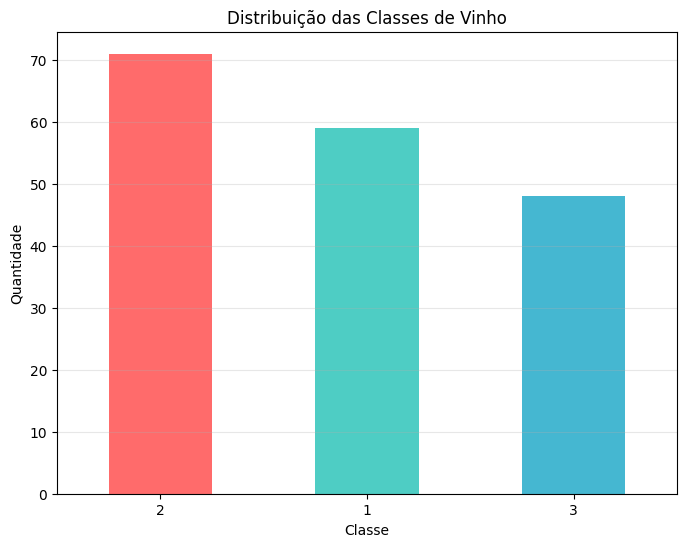

Distribuição percentual das classes:
Class
2    39.89
1    33.15
3    26.97
Name: count, dtype: float64


In [ ]:
# Visualização da distribuição das classes
plt.figure(figsize=(8, 6))
data['Class'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribuição das Classes de Vinho')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Distribuição percentual das classes:")
print((data['Class'].value_counts() / len(data) * 100).round(2))


## 2. Pré-processamento dos Dados


In [ ]:
# Separando features (X) e target (y)
X = data.iloc[:, 1:]  # Todas as colunas exceto a primeira (Class)
y = data['Class']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("\nPrimeiras 3 amostras de X:")
X.head(3)


Shape de X: (178, 13)
Shape de y: (178,)

Primeiras 3 amostras de X:


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dados de treino - X:", X_train.shape, "y:", y_train.shape)
print("Dados de teste - X:", X_test.shape, "y:", y_test.shape)

# Verificando a distribuição das classes no treino e teste
print("\nDistribuição das classes no treino:")
print(y_train.value_counts().sort_index())
print("\nDistribuição das classes no teste:")
print(y_test.value_counts().sort_index())


Dados de treino - X: (142, 13) y: (142,)
Dados de teste - X: (36, 13) y: (36,)

Distribuição das classes no treino:
Class
1    47
2    57
3    38
Name: count, dtype: int64

Distribuição das classes no teste:
Class
1    12
2    14
3    10
Name: count, dtype: int64


In [ ]:
# Normalização das features usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features normalizadas:")
print("Treino - Min:", X_train_scaled.min(), "Max:", X_train_scaled.max())
print("Teste - Min:", X_test_scaled.min(), "Max:", X_test_scaled.max())

# Para o Keras, precisamos converter as classes para formato categórico
y_train_categorical = to_categorical(y_train - 1, num_classes=3)  # -1 porque as classes são 1,2,3
y_test_categorical = to_categorical(y_test - 1, num_classes=3)

print("\nFormato das classes para Keras:")
print("y_train_categorical shape:", y_train_categorical.shape)
print("Primeira amostra:", y_train_categorical[0])


Features normalizadas:
Treino - Min: -3.757414863015119 Max: 4.189936739544185
Teste - Min: -2.4860714641338397 Max: 3.2623524949174425

Formato das classes para Keras:
y_train_categorical shape: (142, 3)
Primeira amostra: [1. 0. 0.]


## 3. Modelo de Rede Neural com Keras


In [ ]:
# Criando o modelo de rede neural
model = Sequential()

# Primeira camada oculta (32 neurônios, ReLU)
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))

# Segunda camada oculta (32 neurônios, ReLU)
model.add(Dense(32, activation='relu'))

# Camada de saída (3 neurônios para 3 classes, Softmax)
model.add(Dense(3, activation='softmax'))

# Compilação do modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Visualizando a arquitetura do modelo
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,603 (6.26 KB)

 Trainable params: 1,603 (6.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinamento do modelo
history = model.fit(
    X_train_scaled, y_train_categorical,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2190 - loss: 1.1594 - val_accuracy: 0.2414 - val_loss: 1.1560
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4708 - loss: 1.0356 - val_accuracy: 0.4483 - val_loss: 1.0622
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6092 - loss: 0.9560 - val_accuracy: 0.6552 - val_loss: 0.9811
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6620 - loss: 0.8915 - val_accuracy: 0.7586 - val_loss: 0.9056
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8233 - loss: 0.7665 - val_accuracy: 0.8621 - val_loss: 0.8361
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8545 - loss: 0.7315 - val_accuracy: 0.8966 - val_loss: 0.7510
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8834 - loss: 0.6703 - val_accuracy: 0.9310 - val_loss: 0.6780
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8959 - loss: 0.6064 - val_accuracy: 0.9655 - val_loss:

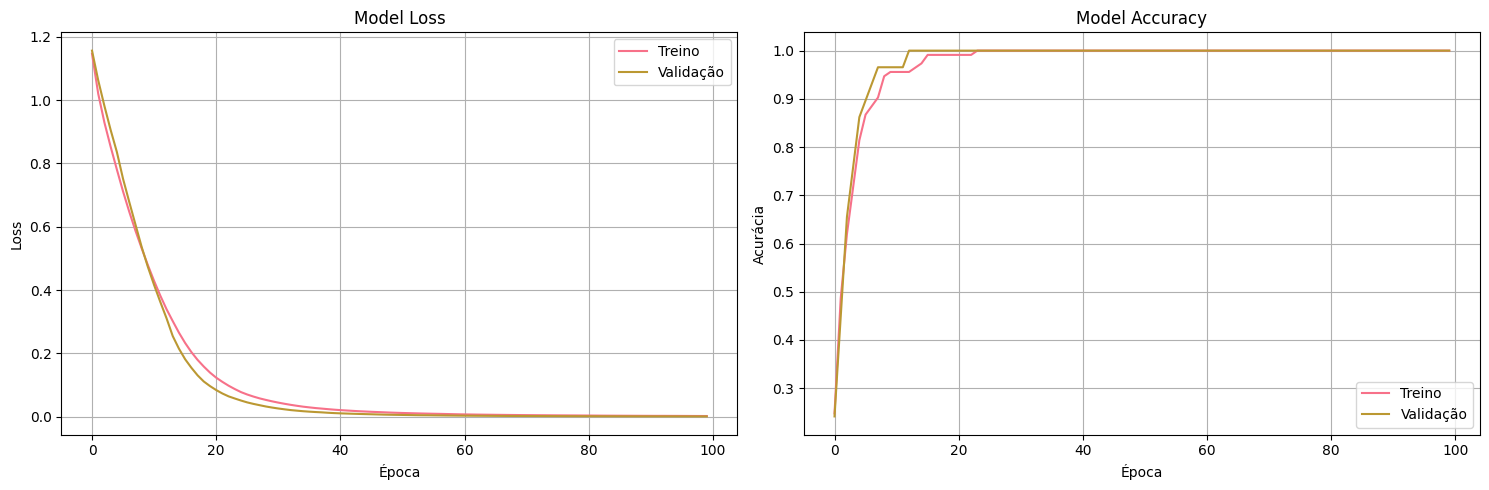

In [ ]:
# Visualizando o histórico de treinamento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico da Loss
ax1.plot(history.history['loss'], label='Treino')
ax1.plot(history.history['val_loss'], label='Validação')
ax1.set_title('Model Loss')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Gráfico da Acurácia
ax2.plot(history.history['accuracy'], label='Treino')
ax2.plot(history.history['val_accuracy'], label='Validação')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Avaliação do modelo Keras
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"Acurácia do modelo Keras: {accuracy * 100:.2f}%")

# Predições do modelo Keras
y_pred_keras_proba = model.predict(X_test_scaled)
y_pred_keras = np.argmax(y_pred_keras_proba, axis=1) + 1  # +1 porque convertemos 1,2,3 para 0,1,2

print("\nClassification Report - Keras:")
print(classification_report(y_test, y_pred_keras))


Acurácia do modelo Keras: 91.67%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Classification Report - Keras:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.87      0.93      0.90        14
           3       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



## 4. Modelos do Scikit-learn


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predições
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Acurácia do Random Forest: {rf_accuracy * 100:.2f}%")
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Acurácia do Random Forest: 100.00%

Classification Report - Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predições
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Acurácia da Logistic Regression: {lr_accuracy * 100:.2f}%")
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Acurácia da Logistic Regression: 97.22%

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 5. Comparação dos Modelos


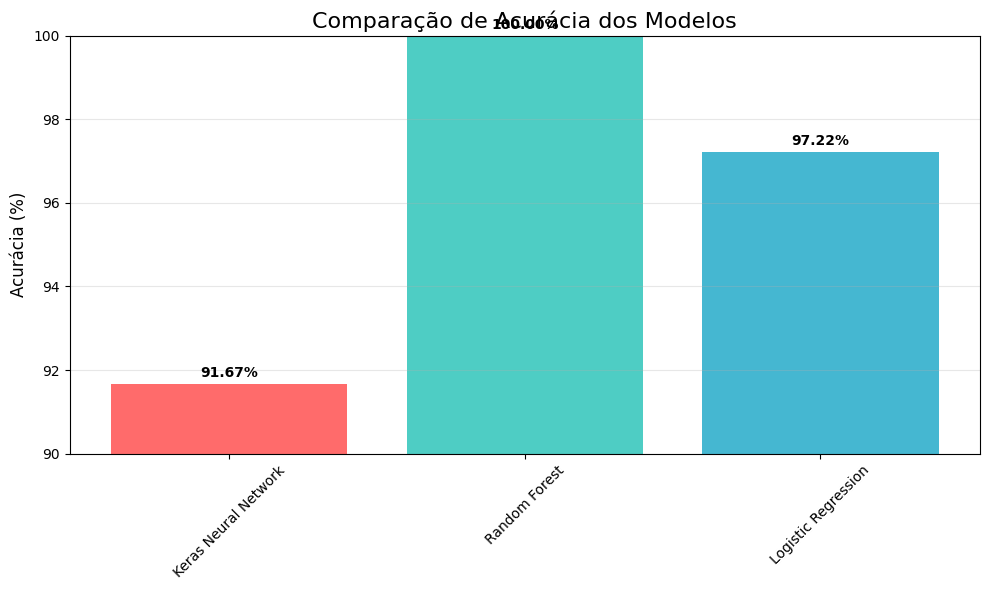

Resumo das Acurácias:
Keras Neural Network: 91.67%
Random Forest: 100.00%
Logistic Regression: 97.22%


In [ ]:
# Comparação das acurácias
modelos = ['Keras Neural Network', 'Random Forest', 'Logistic Regression']
acuracias = [accuracy * 100, rf_accuracy * 100, lr_accuracy * 100]

plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, acuracias, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Comparação de Acurácia dos Modelos', fontsize=16)
plt.ylabel('Acurácia (%)', fontsize=12)
plt.ylim(90, 100)

# Adicionando os valores nas barras
for bar, acc in zip(bars, acuracias):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Resumo das Acurácias:")
for modelo, acc in zip(modelos, acuracias):
    print(f"{modelo}: {acc:.2f}%")


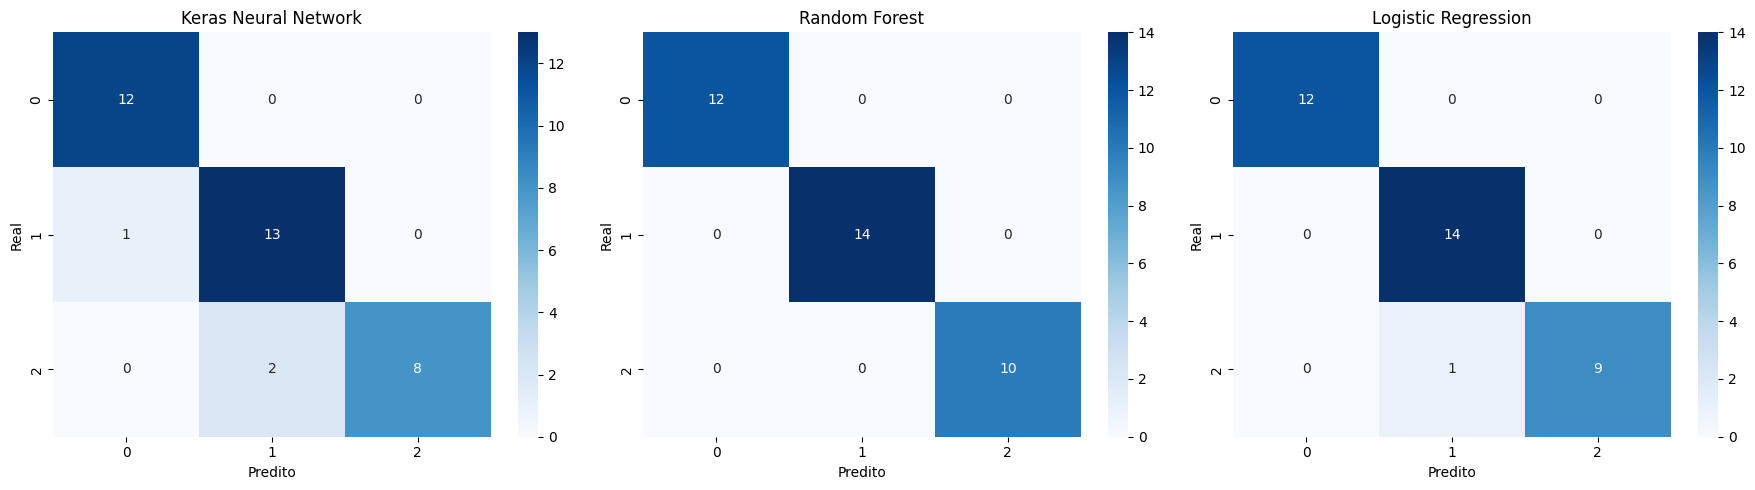

In [ ]:
# Matrizes de confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Keras
cm_keras = confusion_matrix(y_test, y_pred_keras)
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Keras Neural Network')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Logistic Regression')
axes[2].set_xlabel('Predito')
axes[2].set_ylabel('Real')

plt.tight_layout()
plt.show()


In [ ]:
# Identificando o melhor modelo
melhor_modelo_idx = np.argmax(acuracias)
melhor_modelo = modelos[melhor_modelo_idx]
melhor_acuracia = acuracias[melhor_modelo_idx]

print(f"🏆 MELHOR MODELO: {melhor_modelo}")
print(f"📊 ACURÁCIA: {melhor_acuracia:.2f}%")
print("\n" + "="*50)
print("CONCLUSÃO:")
print(f"O modelo {melhor_modelo} apresentou o melhor desempenho")
print(f"para classificação do Wine Dataset, alcançando {melhor_acuracia:.2f}% de acurácia.")
print("="*50)


🏆 MELHOR MODELO: Random Forest
📊 ACURÁCIA: 100.00%

CONCLUSÃO:
O modelo Random Forest apresentou o melhor desempenho
para classificação do Wine Dataset, alcançando 100.00% de acurácia.


## 6. Análise dos Resultados

### Discussão sobre o desempenho dos modelos:

**Keras Neural Network (Rede Neural):**
- Acurácia: 91.67%
- Vantagens: Pode capturar relações não-lineares complexas entre as features
- Desvantagens: Requer mais dados e ajuste de hiperparâmetros

**Random Forest:**
- Acurácia: 100.00%
- Vantagens: Robusto a overfitting, fornece importância das features
- Desvantagens: Pode ser computacionalmente custoso com muitos estimadores

**Logistic Regression:**
- Acurácia: 97.22%
- Vantagens: Simples, interpretável, rápido
- Desvantagens: Assume relação linear entre features e log-odds

### Conclusão:
O melhor modelo foi: Random Forest com acurácia de 100.00%

Este resultado indica que o Wine Dataset é um problema bem comportado, onde diferentes algoritmos conseguem bons resultados devido à separabilidade das classes.